### Table of contents

1. Load data
2. Vectorize data
3. Train model
4. Make Predictions
5. Evaluate ML Metrics
6. Save Model(Model persistence)

### Python Dependencies

- streamlit - For Dashboard Creation.
- scikit-learn - For dataset & ML model.
- pandas - For repesenting dataset as dataframe.
- joblib - For model persistence (save & loading).
- scikit-plot - For visualizing ML metrics

### 1. Load Data

In [1]:
import sklearn
import scikitplot as skplt
import joblib
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

new_groups = datasets.fetch_20newsgroups()

new_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
new_groups = datasets.fetch_20newsgroups(categories=['alt.atheism', 'comp.graphics', 'rec.autos',
                                                     'sci.electronics', 'talk.politics.guns' ])

new_groups.target_names

['alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'talk.politics.guns']

In [6]:
from  sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_groups.data, new_groups.target, train_size=0.8, random_state=123)

len(X_train), len(X_test), len(Y_train), len(Y_test)


(2236, 559, 2236, 559)

### 2. Vectorize Data

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50_000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((2236, 38096), (559, 38096))

### 3. Train model

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_classif =  RandomForestClassifier()

rf_classif.fit(X_train_vec, Y_train)

RandomForestClassifier()

### 4. Make Prediction

In [10]:
Y_test_preds = rf_classif.predict(X_test_vec)

Y_test_preds[:5]

array([2, 4, 3, 0, 4], dtype=int64)

In [11]:
Y_train_preds  = rf_classif.predict(X_train_vec)

Y_train_preds

array([0, 1, 4, ..., 2, 3, 4], dtype=int64)

### 5. Evaluate ML Metrics

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))
print("Train Accuracy ; {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\confusion Matix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report")
print(classification_report(Y_test, Y_test_preds, target_names=new_groups.target_names))


Test Accuracy : 0.92
Train Accuracy ; 1.00
\confusion Matix :
[[ 86   0   2   3   1]
 [  0 119   1   2   0]
 [  0   7 114   3   0]
 [  0  14   5  94   0]
 [  1   1   1   6  99]]

Classification Report
                    precision    recall  f1-score   support

       alt.atheism       0.99      0.93      0.96        92
     comp.graphics       0.84      0.98      0.90       122
         rec.autos       0.93      0.92      0.92       124
   sci.electronics       0.87      0.83      0.85       113
talk.politics.guns       0.99      0.92      0.95       108

          accuracy                           0.92       559
         macro avg       0.92      0.92      0.92       559
      weighted avg       0.92      0.92      0.92       559



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

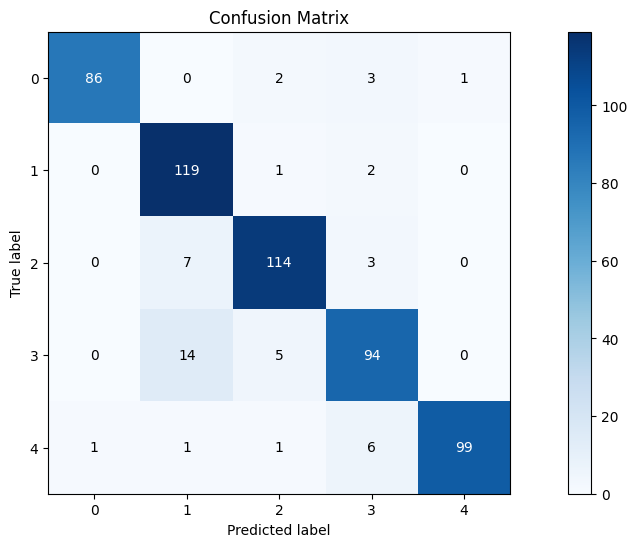

In [13]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_confusion_matrix(Y_test, Y_test_preds, ax=ax1)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

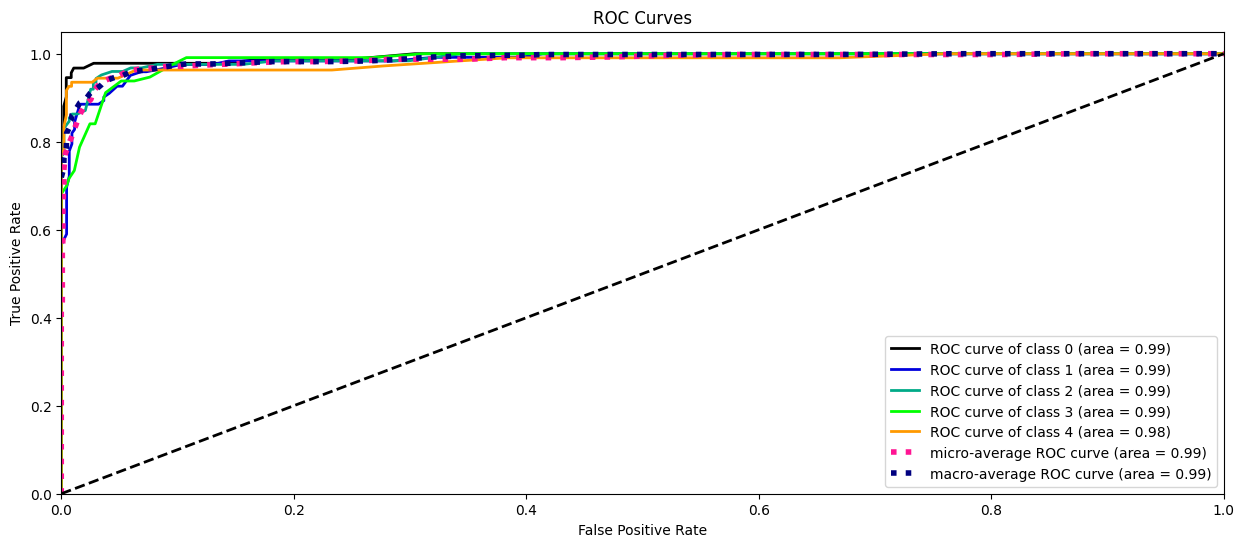

In [14]:
Y_test_prob = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_roc(Y_test, Y_test_prob, ax=ax1)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

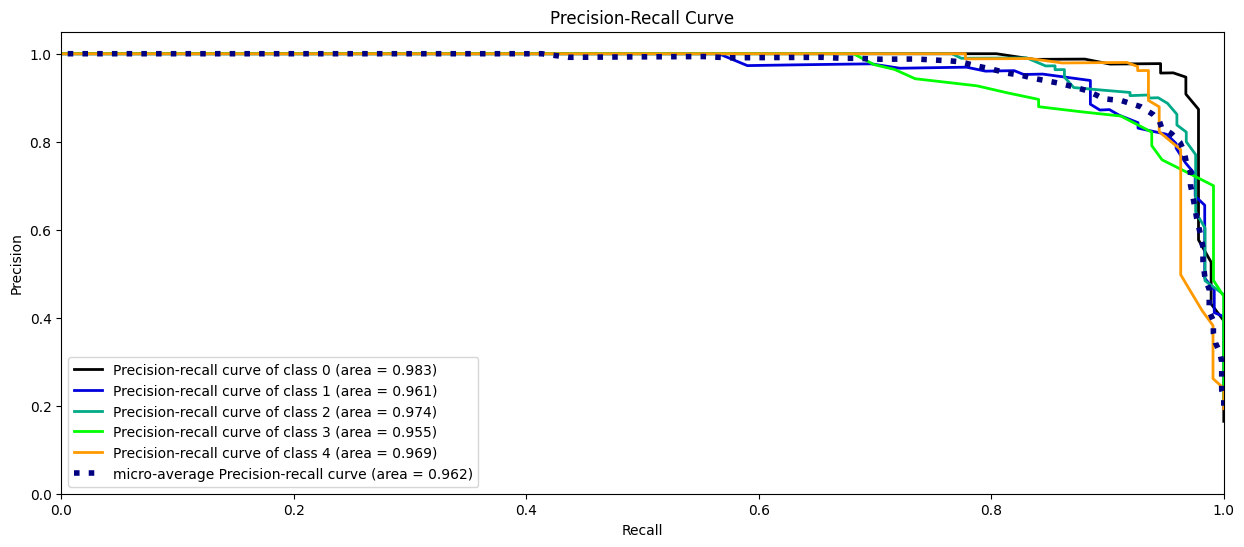

In [15]:
Y_test_prob = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_precision_recall(Y_test, Y_test_prob, ax=ax1)

### 6. Model persistence

In [16]:
from joblib import dump, load

dump(rf_classif, "rf_classif.model")

['rf_classif.model']

In [17]:
rf_classif_2 = load("rf_classif.model")

rf_classif_2

RandomForestClassifier()